In [1]:
pip install resampy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import librosa
import pandas as pd 
import numpy as np
import random 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import Audio

2024-06-08 02:40:36.593927: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
audiofiles = pd.read_csv('./archive 2/UrbanSound8K.csv')
audiofiles.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [7]:
audiofiles['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [8]:
idx = list(np.where(audiofiles['class']=='gun_shot')[0])[0]

arr = np.array(audiofiles['slice_file_name'])
fold = np.array(audiofiles['fold'])
cla = np.array(audiofiles['class'])

original_audio, sample_rate = librosa.load(r'./archive 2/fold' + str(fold[idx]) + '/' + str(arr[idx]))

Audio(data= original_audio, rate = sample_rate)

Text(0.5, 23.52222222222222, 'Time [secs]')

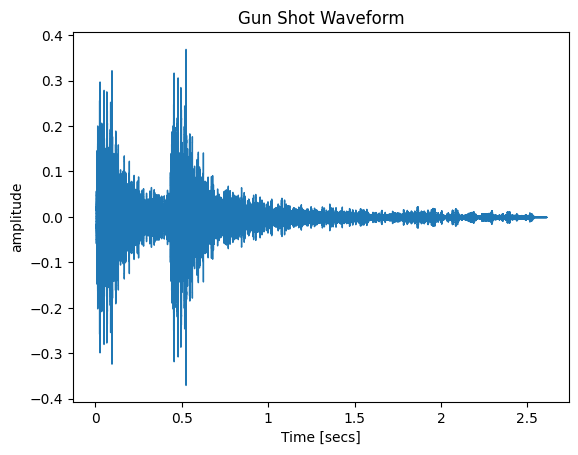

In [9]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(original_audio,sr=sample_rate,ax=ax)
ax.set(title='Gun Shot Waveform')
ax.set_ylabel('amplitude')
ax.set_xlabel('Time [secs]')

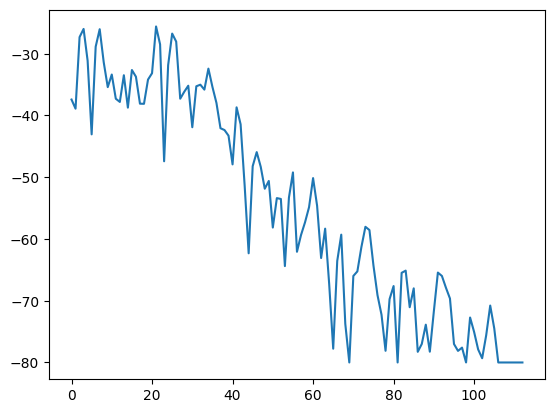

In [10]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(original_audio)),ref = np.max)
D.shape

plt.plot(D[100])

Text(0.5, 1.0, 'gun_shot')

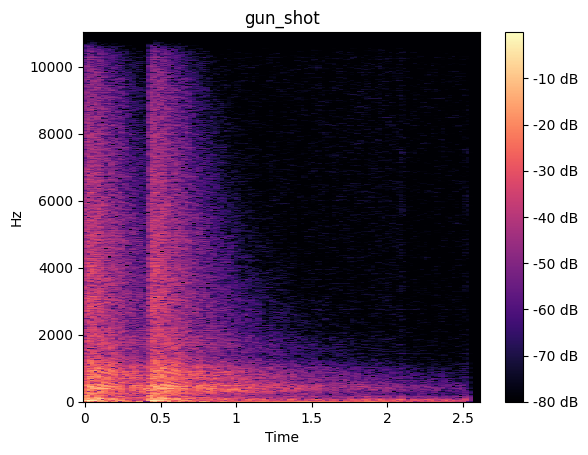

In [11]:
librosa.display.specshow(D,y_axis='linear',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(cla[idx])

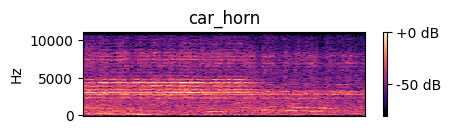

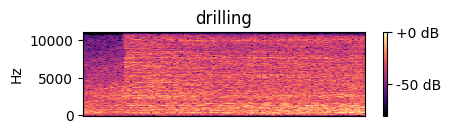

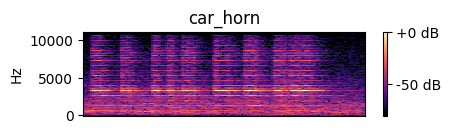

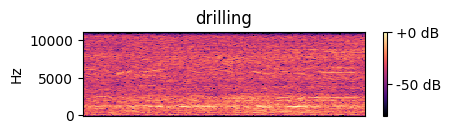

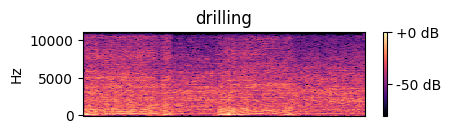

In [12]:
rng = np.random.default_rng()
sample = rng.integers(0,audiofiles.shape[0], size = 5)

for i in sample: 
    path = r'./archive 2/fold' + str(fold[i]) + '/' + str(arr[i])
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize =(10,5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)),ref=np.max)
    plt.subplot(4,2,1)
    librosa.display.specshow(D,y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

(128, 113)
gun_shot


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

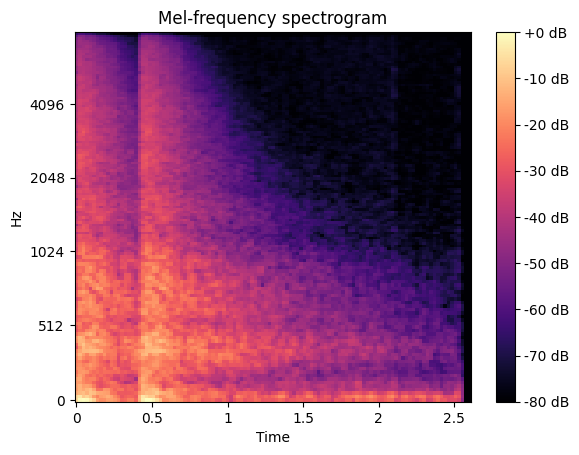

In [13]:
path = r'./archive 2/fold' + str(fold[idx]) + '/' + str(arr[idx])
data, sampling_rate = librosa.load(path)
melspec = librosa.feature.melspectrogram(y=data,sr=sampling_rate)
print(melspec.shape)
print(cla[idx])

Audio(data=data,rate = sampling_rate)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(melspec, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sampling_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [14]:
feature = []
label = []

for i in range(len(audiofiles)):
    filename = r'./archive 2/fold' + str(audiofiles['fold'][i]) + '/' + str(audiofiles['slice_file_name'][i])
    X, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mels = np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate).T,axis=0)
    feature.append(mels)
    label.append(audiofiles['classID'][i])


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [15]:
feature

[array([2.3283628e-05, 2.1359067e-04, 2.8440380e-04, 5.3810340e-04,
        4.9540616e-04, 1.0827768e-03, 5.1993751e-03, 3.5948153e-03,
        3.0365635e-03, 1.1613710e-03, 6.6781387e-04, 1.5533651e-03,
        1.7063342e-03, 1.8260618e-03, 3.1036842e-03, 9.1875130e-03,
        6.5960325e-03, 4.6529896e-03, 1.5760569e-02, 3.3774711e-02,
        1.0552420e-01, 3.3830580e-01, 2.8094569e-01, 3.6958316e-01,
        1.7159154e+00, 6.5498815e+00, 2.7261987e+00, 4.2376456e+00,
        5.7570486e+00, 1.1780505e+01, 3.5155296e+01, 4.2300732e+01,
        5.7533722e+01, 1.7537485e+01, 1.1372511e+01, 1.4538245e+01,
        8.2135019e+00, 5.4653311e+00, 1.7866947e+01, 3.9050770e+01,
        1.4519774e+01, 1.9841825e+01, 1.0210389e+01, 5.7753615e+00,
        1.8238486e+00, 1.4717246e+00, 1.6659281e+00, 1.4016455e+00,
        2.9428976e+00, 7.2478528e+00, 3.9709704e+00, 1.7648830e+00,
        1.7126188e+00, 3.6559606e+00, 2.8441701e+00, 1.7219990e+01,
        4.1166012e+01, 3.0191889e+01, 3.5559502e

In [16]:
classids = audiofiles['classID'].unique()
classes = audiofiles['class'].unique()

In [17]:
temp = np.array([feature,label],dtype='object')
data = temp.transpose()


In [18]:
X_ = data[:,0]
Y = data[:,1]

print(X_.shape,Y.shape)

(8732,) (8732,)


In [19]:
X = np.empty([8732,128])

for i in range(8732):
    X[i] = (X_[i])

In [20]:
Y = to_categorical(Y)

In [21]:
print(X.shape)
(Y.shape)

(8732, 128)


(8732, 10)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=123,test_size = 0.2)
print('Number of Train Samples',X_train.shape[0])
print('Number of test samples',X_test.shape[0])

Number of Train Samples 6985
Number of test samples 1747


In [23]:
model = Sequential(
        [
            Dense(1000,activation='relu',input_shape=(128,)),
            Dense(750,activation='relu'),
            Dense(500,activation='relu'),
            Dense(250,activation='relu'),
            Dense(100,activation='relu'),
            Dense(50,activation='relu'),
            Dense(10,activation='softmax'),
        ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              129000    
                                                                 
 dense_1 (Dense)             (None, 750)               750750    
                                                                 
 dense_2 (Dense)             (None, 500)               375500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 100)               25100     
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                5

In [24]:
model.compile(optimizer='SGD', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=130,batch_size=50,validation_data=[X_test,Y_test])

Epoch 1/130
140/140 [==============================] - 3s 12ms/step - loss: 2.1772 - accuracy: 0.2929 - val_loss: 2.0038 - val_accuracy: 0.3887
Epoch 2/130
140/140 [==============================] - 1s 10ms/step - loss: 1.8976 - accuracy: 0.4090 - val_loss: 1.9465 - val_accuracy: 0.4201
Epoch 3/130
140/140 [==============================] - 1s 10ms/step - loss: 1.8137 - accuracy: 0.4401 - val_loss: 1.9524 - val_accuracy: 0.3755
Epoch 4/130
140/140 [==============================] - 1s 10ms/step - loss: 1.6991 - accuracy: 0.4699 - val_loss: 1.8139 - val_accuracy: 0.4631
Epoch 5/130
140/140 [==============================] - 1s 10ms/step - loss: 1.6530 - accuracy: 0.4780 - val_loss: 1.7732 - val_accuracy: 0.4688
Epoch 6/130
140/140 [==============================] - 1s 10ms/step - loss: 1.5701 - accuracy: 0.4905 - val_loss: 1.6652 - val_accuracy: 0.4911
Epoch 7/130
140/140 [==============================] - 2s 12ms/step - loss: 1.4980 - accuracy: 0.5141 - val_loss: 1.7438 - val_accuracy:

In [25]:
classes = audiofiles.groupby('classID')['class'].unique()
classes

classID
0     [air_conditioner]
1            [car_horn]
2    [children_playing]
3            [dog_bark]
4            [drilling]
5       [engine_idling]
6            [gun_shot]
7          [jackhammer]
8               [siren]
9        [street_music]
Name: class, dtype: object

In [26]:
import numpy as np
import librosa
from IPython.display import Audio

def prediction_parser(filename, model, audiofiles, classes):
    try:
        # Load the audio file
        audiodata, sample_rate = librosa.load(filename, res_type='kaiser_fast')
        # Extract mel spectrogram features
        mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T, axis=0)
        feature = [mels]
        # Extract the label from the DataFrame
        label = audiofiles["class"][audiofiles['slice_file_name'] == filename.split('/')[-1]].values[0]
        
        # Prepare data for prediction
        X = np.empty([1, 128])
        X[0] = feature[0]
        
        # Predict the class
        classid = np.argmax(model.predict(X))
        print('Class predicted:', classes[classid], '\n\n', 'Actual:', label)
        
        # Return the audio data for playback (optional)
        return Audio(data=audiodata, rate=sample_rate)
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
prediction_parser('/Users/shivanshamattya/Downloads/archive 2/fold8/14386-9-0-11.wav', model, audiofiles, classes)


1/1 [==============================] - 0s 430ms/step
Class predicted: ['street_music'] 

 Actual: street_music


Training on foregin data 

In [28]:
import numpy as np
import librosa
from IPython.display import Audio
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your neural network model
def get_model():
    model = Sequential([
        Dense(1000, activation='relu', input_shape=(128,)),
        Dense(750, activation='relu'),
        Dense(500, activation='relu'),
        Dense(250, activation='relu'),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Prediction function that also prints softmax probabilities
def prediction_parser(filename, model, audiofiles, classes):
    try:
        # Load the audio file
        audiodata, sample_rate = librosa.load(filename, res_type='kaiser_fast')
        # Extract mel spectrogram features
        mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T, axis=0)
        feature = np.array([mels])  # Ensure the feature is in the correct shape for prediction
        
        # Predict the class and output probabilities
        probabilities = model.predict(feature)
        classid = np.argmax(probabilities)
        predicted_class = classes[classid]
        
        # Print the predicted class and probabilities
        print('Class predicted:', predicted_class)
        print('Softmax Probabilities:')
        for i, prob in enumerate(probabilities[0]):
            print(f"{classes[i]}: {prob*100:.2f}%")
        
        # Return the audio data for playback (optional)
        return Audio(data=audiodata, rate=sample_rate), audiodata, sample_rate
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None

def main():
    # Load the model
    model = get_model()
    
    # Load the 'audiofiles' DataFrame (update path as necessary)
    audiofiles = pd.read_csv('./archive 2/UrbanSound8K.csv')
    classes = audiofiles.groupby('classID')['class'].unique().apply(lambda x: x[0]).tolist()
    
    # Get user input for the audio file path
    audio_file_path = input("Please enter the path to your audio file: ")

    # Call the prediction function and play the audio
    audio_output, audiodata, sample_rate = prediction_parser(audio_file_path, model, audiofiles, classes)
    if audio_output is not None:
        display(audio_output)  # This will play the audio in Jupyter Notebook or similar environments

# Run the main function
if __name__ == '__main__':
    main()

1/1 [==============================] - 0s 168ms/step
Class predicted: gun_shot
Softmax Probabilities:
air_conditioner: 8.84%
car_horn: 5.98%
children_playing: 9.91%
dog_bark: 13.76%
drilling: 8.53%
engine_idling: 8.13%
gun_shot: 14.43%
jackhammer: 12.72%
siren: 13.28%
street_music: 4.43%
